Explaratory Data Analysis of an airline flights dataset to gain understanding of flights patterns and user behaviors.<br>
Through data exploration and visualization, the goal is to reveal as much trends in flight routes, booking behaviors, and more.<br> By understanding these dynamics, airlines and related stakeholders can optimize operations, enhance customer experience, and make informed business decisions.

Table of contents:

    0. Importing Data
    1. Understanding Data
    2. Data Preparation
    3. Understanding Features
    4. Feature Relationships
    5. Q&A

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
# Read data from a CSV file into a DataFrame
df = pd.read_csv('airlines_booking.csv', encoding='latin1')

#### 1. Understanding Data
    shape, head, columns, dtypes, desribe, isna, unique

In [3]:
# DataFrame dimensions
df.shape

(50000, 14)

In [4]:
# Header and first 5 rows
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [5]:
# Column names
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [6]:
# Data types of each column
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [7]:
# Descriptive statistics of numerical columns
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [8]:
# Number of missing values
df.isna().sum().sum()

0

In [9]:
# Getting familiar with some categorical columns
print(df['sales_channel'].unique())
print()
print(df['trip_type'].unique())
print()
print(df['booking_origin'].unique())
#'flight_day', 'route'

['Internet' 'Mobile']

['RoundTrip' 'CircleTrip' 'OneWay']

['New Zealand' 'India' 'United Kingdom' 'China' 'South Korea' 'Japan'
 'Malaysia' 'Singapore' 'Switzerland' 'Germany' 'Indonesia'
 'Czech Republic' 'Vietnam' 'Thailand' 'Spain' 'Romania' 'Ireland' 'Italy'
 'Slovakia' 'United Arab Emirates' 'Tonga' 'R\x82union' '(not set)'
 'Saudi Arabia' 'Netherlands' 'Qatar' 'Hong Kong' 'Philippines'
 'Sri Lanka' 'France' 'Croatia' 'United States' 'Laos' 'Hungary'
 'Portugal' 'Cyprus' 'Australia' 'Cambodia' 'Poland' 'Belgium' 'Oman'
 'Bangladesh' 'Kazakhstan' 'Brazil' 'Turkey' 'Kenya' 'Taiwan' 'Brunei'
 'Chile' 'Bulgaria' 'Ukraine' 'Denmark' 'Colombia' 'Iran' 'Bahrain'
 'Solomon Islands' 'Slovenia' 'Mauritius' 'Nepal' 'Russia' 'Kuwait'
 'Mexico' 'Sweden' 'Austria' 'Lebanon' 'Jordan' 'Greece' 'Mongolia'
 'Canada' 'Tanzania' 'Peru' 'Timor-Leste' 'Argentina' 'New Caledonia'
 'Macau' 'Myanmar (Burma)' 'Norway' 'Panama' 'Bhutan' 'Norfolk Island'
 'Finland' 'Nicaragua' 'Maldives' 'Egypt' 'Israel' '

#### 2. Data Preparation
    replacing values, renaming columns, separating numerical and categorical variables

In [10]:
# Replacing inaccurate/repeating values
df['booking_origin'] = df['booking_origin'].replace('R\x82union', 'Reunion')
df['booking_origin'] = df['booking_origin'].replace('Czechia', 'Czech Republic')

In [11]:
# Renaming columns
df = df.rename(columns={'num_passengers': 'Num_Passengers', 'sales_channel': 'Purchase_Channel',
                   'trip_type': 'Trip_Type', 'purchase_lead': 'Purchase_Lead_Days',
                   'length_of_stay': 'Duration_of_Stay', 'flight_hour': 'Hour_of_Flight',
                   'flight_day': 'Day_of_Flight', 'route': 'Route', 'booking_origin': 'Booking_Origin',
                   'wants_extra_baggage': 'Extra_Baggage', 'wants_preferred_seat': 'Preferred_Seat',
                   'wants_in_flight_meals': 'On_Flight_Meals', 'flight_duration': 'Flight_Duration',
                   'booking_complete': 'Booking_Complete'})

In [12]:
# Extracting numerical and categorical columns
num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

#### 3. Understanding Features (Univariate Analysis)
    plotting features distributions (box plot, kernel density estimate, histogram, bar chart)

In [13]:
# Outliers
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)

IQR = Q3 - Q1

outliers = (df[num_cols] < (Q1 - IQR*1.5)) | (df[num_cols] > (Q3 + IQR*1.5))
outliers.sum()

Num_Passengers        2903
Purchase_Lead_Days    3456
Duration_of_Stay      3807
Hour_of_Flight           0
Extra_Baggage            0
Preferred_Seat           0
On_Flight_Meals          0
Flight_Duration          0
Booking_Complete      7478
dtype: int64

In this case, the 'Booking_Complete' column doesn't really contain outlier values since it only holds 0s and 1s. However, due to the predominance of 0s, the presence of 1s is detected as outliers.

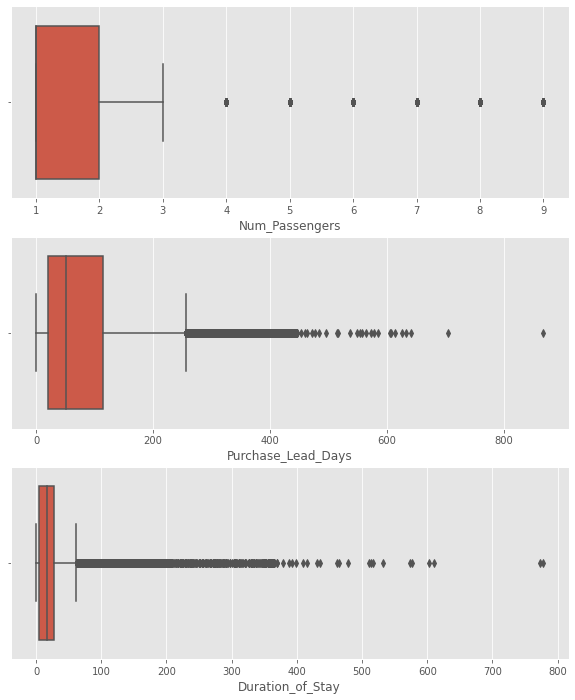

In [14]:
# Vizualizing outliers
plt.figure(figsize = (10, 12))

for i, col in enumerate(df[['Num_Passengers', 'Purchase_Lead_Days', 'Duration_of_Stay']]):
    plt.subplot(3, 1, i+1)
    sns.boxplot(x = col, data = df)
    
plt.show()

Observations:

    - on 75% of flights, people travel in groups of three or fewer
    - majority of passengers book their flights less than 100 days in advance
    - most trips lasts for 30 days or less

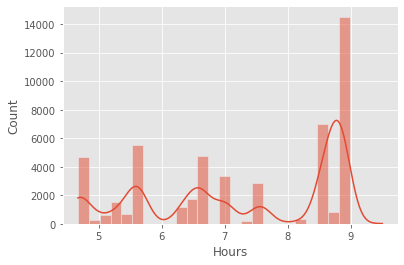

In [15]:
#df['Flight_Duration'].plot(kind='kde', title='Flight Duration')
sns.histplot(df['Flight_Duration'], kde=True)
plt.xlabel('Hours')
plt.show()

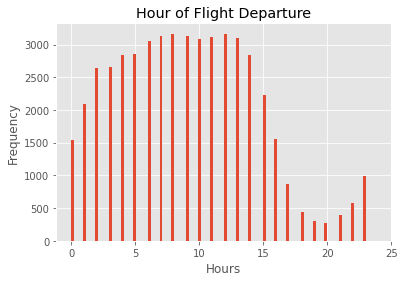

In [16]:
df['Hour_of_Flight'].plot(kind='hist', bins=100, title='Hour of Flight Departure')
plt.xlabel('Hours')
plt.xticks(range(0, 26,5))

plt.show()

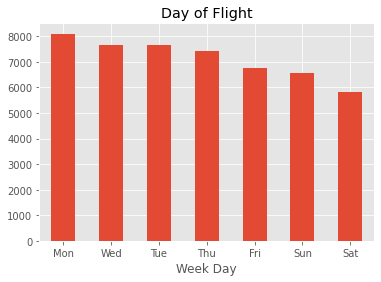

In [17]:
df['Day_of_Flight'].value_counts().plot(kind='bar', title='Day of Flight')
plt.xlabel('Week Day')
plt.xticks(rotation=0)
plt.show()

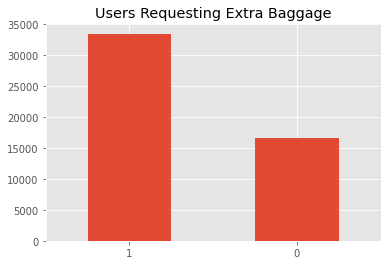

In [18]:
df['Extra_Baggage'].value_counts().plot(kind='bar', title='Users Requesting Extra Baggage')
plt.xlabel('')
plt.xticks(rotation=0)
plt.show()

Noticeably, the highest number of trips are Round, flights that returns to the starting destination without additional stopovers.

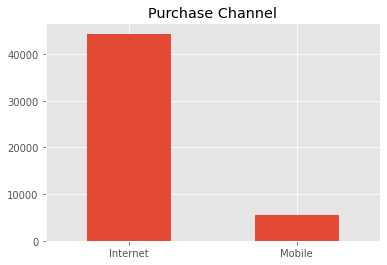

In [19]:
df['Purchase_Channel'].value_counts().plot(kind='bar', title='Purchase Channel')
plt.xlabel('')
plt.xticks(rotation=0)
plt.show()

The vast majority of bookings are made through the Internet. 

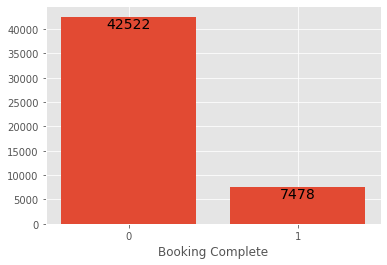

In [20]:
counts = df['Booking_Complete'].value_counts()

plt.bar(counts.index, counts.values)

for i, v in enumerate(counts.values):
  plt.text(i, v + 0.1, str(v), ha='center', va='top', fontsize=14)

plt.xlabel("Booking Complete")
plt.xticks([1,0])
plt.show()

__Note:__ Only 7.478 out of 50.000 bookings were completed.

### 4. Feature Relationships (Bivariate/Multivariate Analysis)

In [21]:
# print(num_cols)

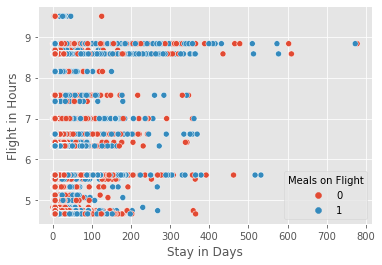

In [22]:
ax = sns.scatterplot(x='Duration_of_Stay' , y='Flight_Duration', hue='On_Flight_Meals', data=df)
ax.set_xlabel('Stay in Days')
ax.set_ylabel('Flight in Hours')
ax.legend(title='Meals on Flight')
plt.show()

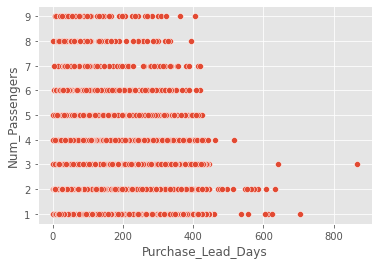

In [23]:
sns.scatterplot(x='Purchase_Lead_Days' , y='Num_Passengers', data=df)
plt.show()

In [24]:
df[num_cols].corr()

,Num_Passengers,Purchase_Lead_Days,Duration_of_Stay,Hour_of_Flight,Extra_Baggage,Preferred_Seat,On_Flight_Meals,Flight_Duration,Booking_Complete
Num_Passengers,1.000000,0.212606,-0.115850,0.015607,0.120404,0.028544,0.022943,-0.063169,0.024116
Purchase_Lead_Days,0.212606,1.000000,-0.076560,0.035973,-0.022207,-0.004499,-0.022653,0.067866,-0.022131
Duration_of_Stay,-0.115850,-0.076560,1.000000,-0.024872,0.176757,0.032264,0.098828,0.141181,-0.042408
Hour_of_Flight,0.015607,0.035973,-0.024872,1.000000,-0.011434,0.012171,0.013014,-0.002101,0.007127
Extra_Baggage,0.120404,-0.022207,0.176757,-0.011434,1.000000,0.207669,0.216470,0.057054,0.068139
Preferred_Seat,0.028544,-0.004499,0.032264,0.012171,0.207669,1.000000,0.315088,0.101289,0.050116
On_Flight_Meals,0.022943,-0.022653,0.098828,0.013014,0.216470,0.315088,1.000000,0.154312,0.026511
Flight_Duration,-0.063169,0.067866,0.141181,-0.002101,0.057054,0.101289,0.154312,1.000000,-0.106266
Booking_Complete,0.024116,-0.022131,-0.042408,0.007127,0.068139,0.050116,0.026511,-0.106266,1.000000


This matrix indicates that there is no strong correlation between variables. <br> The stronges is between On_Flight_Meals and Preferred_Seat (passengers' preferences for meals and their choice of seating arrangements during flights).

##### 5. Q&A (Exploratory Questions)
    5.1. Average Flight Duration
    5.2. On what Day and Hour people book the most flights
    5.3. Top5 Destinations from which complete/uncomplete Bookings are made
    5.4. What are the top5 most popular Routes by Type of flight
    5.5  Number of users requesting either Flight Meals or Preferred Seat based on Flight Duration 

    5.1. Average Flight Duration

Flights last for 7.28 hours on average


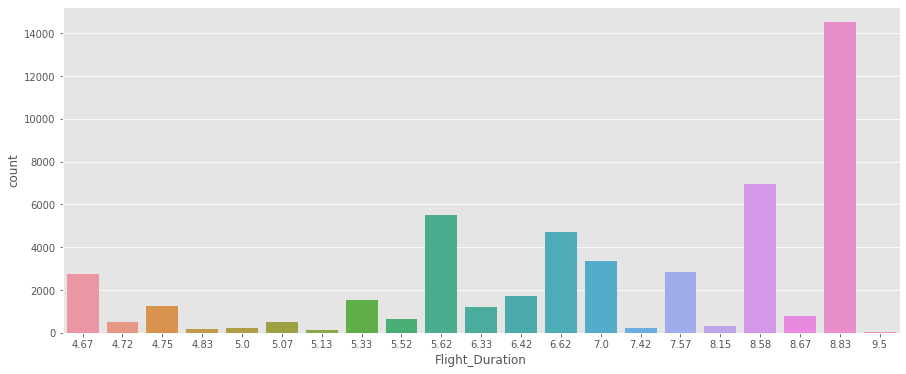

In [25]:
# Calculate the average flight duration
average_duration = df['Flight_Duration'].mean()
print(f"Flights last for {average_duration:.2f} hours on average")

plt.figure(figsize=(15,6))
sns.countplot(df, x='Flight_Duration')
plt.show()

    5.2. On what Day and Hour people book the most flights

In [26]:
flight_counts = df.groupby(['Day_of_Flight', 'Hour_of_Flight']).size().reset_index()
flight_counts.columns = ['Day', 'Hour', 'Count']
most_bookings = flight_counts.loc[flight_counts['Count'].idxmax()]

print(most_bookings)

Day      Mon
Hour       8
Count    558
Name: 32, dtype: object


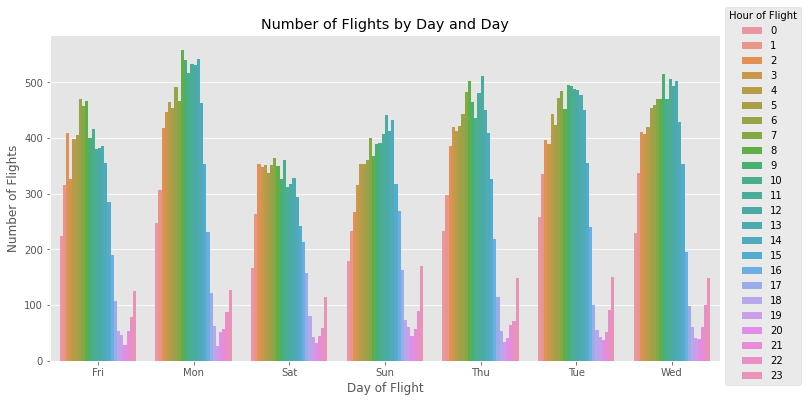

In [27]:
plt.figure(figsize=(12, 6))

sns.barplot(x='Day', y='Count', hue='Hour', data=flight_counts)

plt.title('Number of Flights by Day and Day')
plt.xlabel('Day of Flight')
plt.ylabel('Number of Flights')
plt.legend(title='Hour of Flight',  bbox_to_anchor=(1, 1.1), loc='upper left')

plt.show()

Flight Hours follow the same pattern for each day of a week as the overall distribution visualized above.

    5.3. Top5 Destinations from which complete/uncomplete Bookings are made

In [28]:
print('Top5 countries with completed bookings:')
df.query('Booking_Complete == 1')['Booking_Origin'].value_counts().reset_index().head(5)

Top5 countries with completed bookings:


,Booking_Origin,count
0,Malaysia,2468
1,Australia,900
2,China,694
3,Indonesia,615
4,Japan,478


In [29]:
print('Top5 countries with uncompleted bookings:')
df.query('Booking_Complete == 0')['Booking_Origin'].value_counts().reset_index().head(5)

Top5 countries with uncompleted bookings:


,Booking_Origin,count
0,Australia,16972
1,Malaysia,4706
2,South Korea,4097
3,Japan,3407
4,China,2693


    5.4. What are the top5 most popular Routes by Type of flight

* Most popular routes on **Round Trips** (and in the whole dataset):

        Auckland, New Zeland (AKL) ->- Kuala Lumpur, Malaysia (KUL)
        Penang, Malaysia (PEN) ->- Taipei City, Malaysia (TPE)
        Melbourne, Autralia (MEL) ->- Ho Chi Minh City, Vietnam (SGN)
        Seoul, South Korea (ICN) ->- Changi, Singapore (SIN)
        Bangkok, Thailand (DMK) ->- Osaka, Japan (KIX)
        
* Most popular routes on **One Way** Trips:

        Seoul, South Korea (ICN) ->- Sydney, Australia (SYD)
        Auckland, New Zeland (AKL) ->- Kuala Lumpur, Malaysia (KUL)
        Tokyo, Japan (HND) ->- Perth, Australia (PER)
        Seoul, South Korea (ICN) ->- Changi, Singapore (SIN)
        Melbourne, Autralia (MEL) ->- Taipei City, Malaysia (TPE)
        
* Most popular routes on **Circle Trips** (tirps that include multiple stops along the route):<br>
_Note: All these count less then 10 flights_

        Seoul, South Korea (ICN) ->- Sydney, Australia (SYD)
        Colombo, Sri Lanka(CMB) ->- Melbourne, Autralia (MEL)
        Melbourne, Autralia (MEL) ->- Taipei City, Malaysia (TPE)
        Colombo, Sri Lanka(CMB) ->- Sydney, Australia (SYD)
        Angeles, Philippines (CRK) ->- Gold Coast, Australia (OOL)

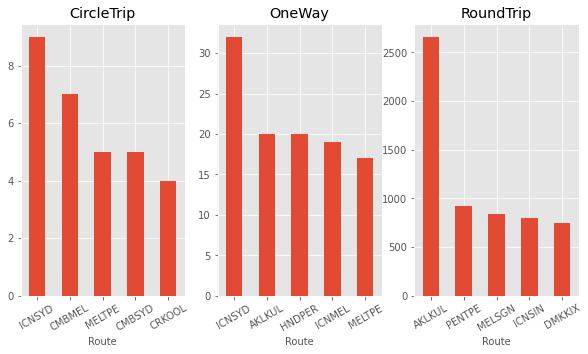

In [30]:
plt.figure(figsize = (10, 5))

sorted_trip_types = df['Trip_Type'].unique()
sorted_trip_types.sort()

for i, triptype in enumerate(sorted_trip_types):
    plt.subplot(1, 3, i+1)

    top5 = df.query(f'Trip_Type == "{triptype}"')['Route'].value_counts().head(5)
    top5.plot(kind='bar')
    plt.xlabel('Route', fontsize=10)
    plt.xticks(rotation=30)
    plt.title(f'{triptype}')
plt.show()

    5.5  Number of users requesting either Flight Meals or Preferred Seat based on Flight Duration

<Figure size 720x432 with 0 Axes>

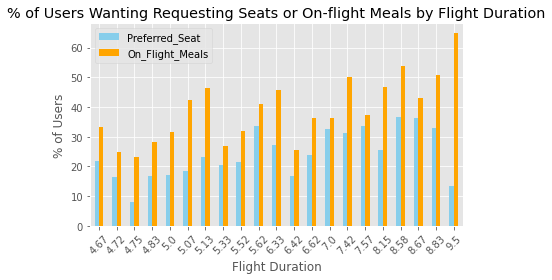

In [31]:
# Total number of users per flight duration
total_users = df.groupby('Flight_Duration').count()['Booking_Complete']

# Counts of users wanting preferred seats or on-flight meals per flight duration
requests_counts = df.query('Preferred_Seat == 1 or On_Flight_Meals == 1').groupby('Flight_Duration').sum()[['Preferred_Seat', 'On_Flight_Meals']]

# Percentage of users for each duration
duration_percentages = requests_counts.div(total_users, axis=0) * 100

plt.figure(figsize=(10, 6))

duration_percentages.plot(kind='bar', color=['skyblue', 'orange'], width=0.5)

plt.xlabel('Flight Duration')
plt.ylabel('% of Users')
plt.title('% of Users Wanting Requesting Seats or On-flight Meals by Flight Duration')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()